- **Open**: Es el precio al inicio del periodo de tiempo (por ejemplo, el inicio de la jornada de trading).
- **High**: El precio más alto alcanzado durante el periodo.
- **Low**: El precio más bajo registrado durante ese periodo.
- **Close**: El precio de cierre al final del periodo.
- **Volume**: La cantidad total de contratos de futuros de gas natural transaccionados en ese periodo.
- **Volume MA**: La media móvil del volumen de transacciones, suavizando las fluctuaciones para identificar tendencias.

1 ¿Cómo ha evolucionado el precio del gas holandés a lo largo de los últimos años?

Objetivo: Analizar las tendencias generales de los precios del gas natural en los últimos años. ¿Ha habido un aumento o disminución significativa en el precio? ¿Qué años muestran picos o caídas? Esto puede ayudar a entender si los precios están correlacionados con cambios en la oferta y la demanda, políticas energéticas o eventos geopolíticos.

2¿Cuál ha sido la volatilidad de los precios del gas?

Objetivo: Evaluar la variación porcentual diaria de los precios. Esto nos puede dar una idea de cuán volátil ha sido el mercado de gas y qué tan sensible es a eventos inesperados, como crisis energéticas o fluctuaciones en la oferta.

3¿Existen patrones estacionales en los precios del gas natural?

Objetivo: Investigar si hay fluctuaciones estacionales en los precios, como aumentos en los precios durante el invierno debido al aumento de la demanda o caídas en los precios durante los meses más cálidos.

4¿Cómo ha influido la crisis energética global (por ejemplo, la guerra en Ucrania) en los precios del gas?

Objetivo: Correlacionar cambios significativos en los precios del gas con eventos globales importantes. Por ejemplo, la invasión de Ucrania en 2022 tuvo un impacto significativo en los mercados de gas en Europa. Analizar si los precios del gas han aumentado de manera proporcional a estos eventos.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
 
df = pd.read_csv('datasets_limpiados/FUTUROS_GAS_HOLANDESES_2018_2022.csv')

# Convertir la columna 'DATE' a tipo datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Verificar que la conversión haya sido exitosa
print(df['DATE'].head())

print(df.info())

0   2018-01-01 23:00:00+00:00
1   2018-01-02 23:00:00+00:00
2   2018-01-03 23:00:00+00:00
3   2018-01-04 23:00:00+00:00
4   2018-01-07 23:00:00+00:00
Name: DATE, dtype: datetime64[ns, UTC]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   DATE       1176 non-null   datetime64[ns, UTC]
 1   open       1176 non-null   float64            
 2   high       1176 non-null   float64            
 3   low        1176 non-null   float64            
 4   close      1176 non-null   float64            
 5   Volume     1176 non-null   float64            
 6   Volume MA  1176 non-null   float64            
 7   YEAR       1176 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 73.6 KB
None


YEAR
2018     22.260694
2019     14.741429
2020      9.666126
2021     47.661079
2022    128.763305
Name: close, dtype: float64


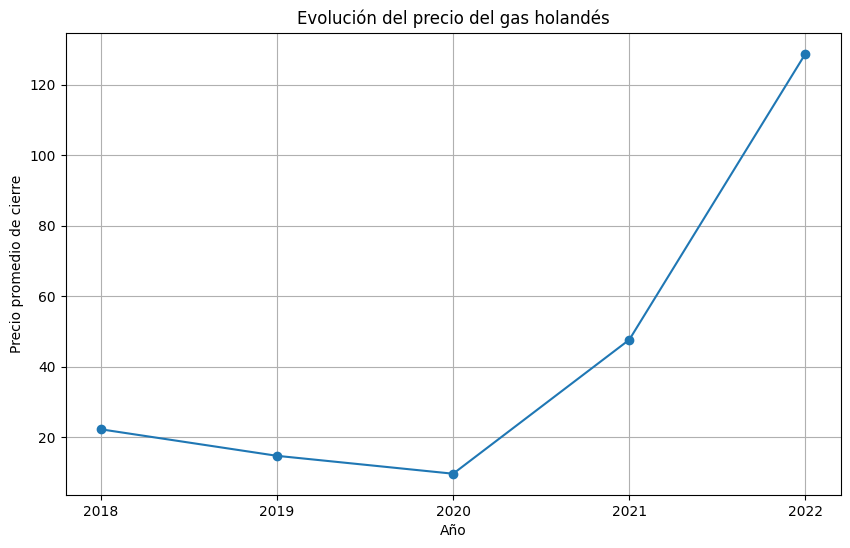

In [7]:
# PREGUNTA 1   ¿Cómo ha evolucionado el precio del gas holandés a lo largo de los últimos años?

# Agrupar por 'YEAR' y calcular el promedio de la columna 'close'
precio_anual = df.groupby('YEAR')['close'].mean()

# Mostrar los resultados
print(precio_anual)

# Graficar los resultados
plt.figure(figsize=(10,6))
plt.plot(precio_anual.index, precio_anual.values, marker='o')

# Ajustar el eje X para que solo muestre años enteros
plt.xticks(precio_anual.index.astype(int))

# Títulos y etiquetas
plt.title("Evolución del precio del gas holandés")
plt.xlabel("Año")
plt.ylabel("Precio promedio de cierre")

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [8]:
# PREGUNTA 2  ¿Cuál ha sido la volatilidad de los precios del gas?

df['percentage_change'] = df['close'].pct_change() * 100  # Variación porcentual diaria

# Calcular la volatilidad (desviación estándar de las variaciones porcentuales)
volatilidad = df['percentage_change'].std()  # Desviación estándar de los cambios porcentuales
print(f"La volatilidad del precio del gas es: {volatilidad:.2f}%")

La volatilidad del precio del gas es: 5.34%


month
1     31.225245
2     29.430316
3     39.150491
4     31.108146
5     32.649396
6     35.490358
7     48.307410
8     65.993636
9     30.702301
10    35.852977
11    35.203210
12    42.873193
Name: close, dtype: float64


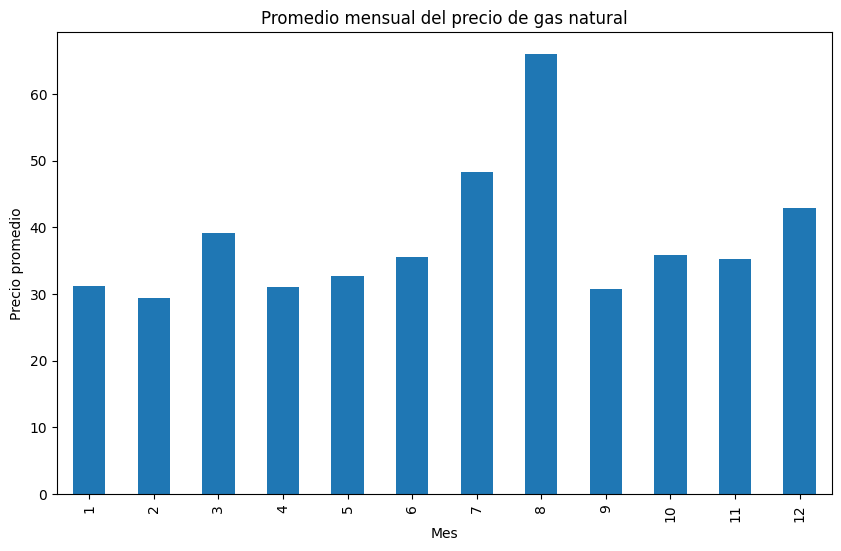

In [9]:
# PREGUNTA 3   ¿Existen patrones estacionales en los precios del gas natural?

# Extraer el mes de la fecha
df['month'] = df['DATE'].dt.month

# Calcular el precio promedio por mes
precios_por_mes = df.groupby('month')['close'].mean()
print(precios_por_mes)
# Visualizar los resultados
precios_por_mes.plot(kind='bar', figsize=(10,6))
plt.title('Promedio mensual del precio de gas natural')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.show()

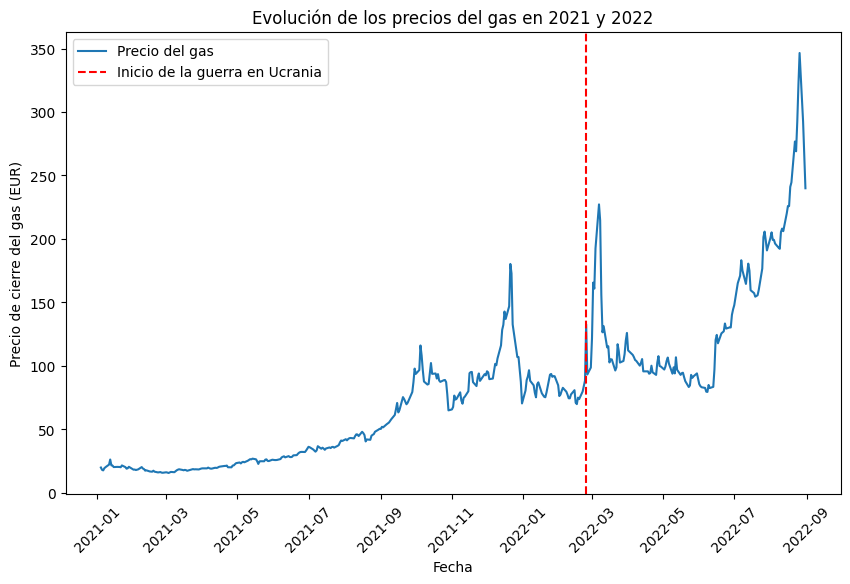

In [10]:
# PREGUNTA 4  ¿Cómo ha influido la crisis energética global (por ejemplo, la guerra en Ucrania) en los precios del gas?

# Filtrar los datos de los años 2021 y 2022
df_2021_2022 = df[df['YEAR'].isin([2021, 2022])].copy()

# Convertir la columna de fecha a datetime si no se ha hecho
df_2021_2022['DATE'] = pd.to_datetime(df_2021_2022['DATE'], errors='coerce')

# Establecer la fecha del evento (inicio de la guerra en Ucrania)
evento_fecha = pd.to_datetime('2022-02-24')

# Graficar la evolución de los precios durante 2021 y 2022
plt.figure(figsize=(10, 6))
plt.plot(df_2021_2022['DATE'], df_2021_2022['close'], label='Precio del gas')
plt.axvline(x=evento_fecha, color='r', linestyle='--', label='Inicio de la guerra en Ucrania')  # Línea vertical del evento
plt.title('Evolución de los precios del gas en 2021 y 2022')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre del gas (EUR)')
plt.legend()
plt.xticks(rotation=45)
plt.show()